In [171]:
from glob import glob
import matplotlib.image as mpimg
from PIL import Image

In [172]:
#All of the photos taken

images = glob('/Users/ewa_anna_szyszka/Desktop/LBA_ML/*')

<bound method Figure.show of <matplotlib.figure.Figure object at 0x1a2b879210>>

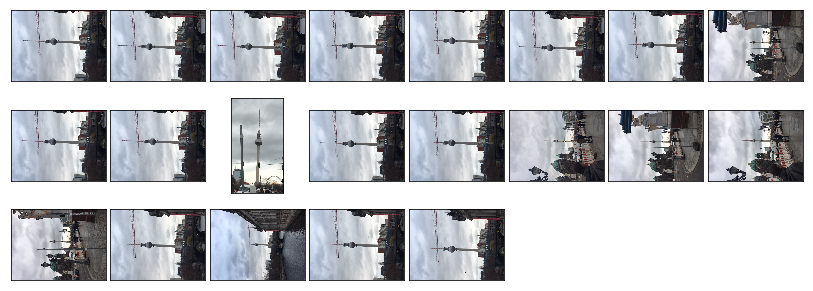

In [173]:
#Showing the images pre-PCA

fig = plt.figure(figsize=(11,11)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(21):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(mpimg.imread(images[i]), cmap=plt.cm.bone, interpolation='nearest')
    
fig.show

In [174]:
#Flattening the array - checking the dimensions

with open('/Users/ewa_anna_szyszka/Desktop/LBA_ML/IMG_5861-1.JPG', 'r+b') as f:
    with Image.open(f) as image:
        resized = image.resize((100, 100))
        a = np.array(resized)
        print a.shape
        z = np.array(resized).flatten()
        print z.shape

(100, 100, 3)
(30000,)


In [175]:
#Flattening the data and resizing the data - function
im = []

def flatten_image_array(image_file):
    with open(image_file, 'r+b') as f:
        with Image.open(f) as image:
            resized = image.resize((100, 100)) #resizing of the image
            return np.array(resized).flatten()
    
#Flattening all images 
for url in images:
    im.append(flatten_image_array(url))
    
im[0]

array([213, 230, 250, ...,  20,  18,  21], dtype=uint8)

In [176]:
im = np.array(im)
im.shape

(21, 30000)

In [177]:
#Compressing the images into two dimensions using PCA

pca = PCA(2) 
X_proj = pca.fit_transform(im) #What is the difference between fit and fit_transform?
print X_proj

[[-4018.49559397  1289.57451854]
 [-2673.22672659 -2580.98051114]
 [-2293.16474413 -2690.29096282]
 [-3662.54689909 -1648.17742802]
 [-3888.5195719   1674.83658266]
 [-2982.69303228 -1970.03213674]
 [-4070.05550282  -648.25521014]
 [ 9364.57087703 -1003.96955517]
 [-3781.35788445   848.53346069]
 [-4018.49559397  1289.57451854]
 [ 1705.75770632 13378.00434215]
 [-4001.83152265  -328.59599002]
 [-4158.25349273   603.80691132]
 [ 6252.99152471   347.59148885]
 [ 9243.79602607  -831.68609537]
 [ 7006.87838512   305.58599929]
 [ 8420.85314975 -1567.18575412]
 [-2721.15676195 -2393.35801901]
 [ 6729.0512189  -2278.5462306 ]
 [-4024.97480813  -795.77920649]
 [-2429.12675322 -1000.65072241]]


In [178]:
def image_from_component_values(component):
    hi = max(component)
    lo = min(component)
    n = int(len(component) / 3)
    divisor = hi - lo
    if divisor == 0:
        divisor = 1
    
    def rescale(x):
        return int(255 * (x - lo) / divisor)
    
    d = [(rescale(component[3 * i]),
          rescale(component[3 * i + 1]),
          rescale(component[3 * i + 2])) for i in range(n)]
    im = Image.new('RGB',(100,100))
    im.putdata(d)
    return im

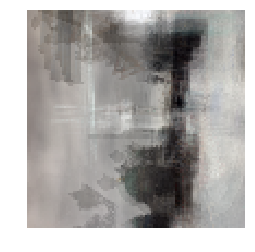

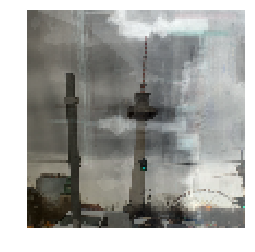

In [179]:
fig=plt.figure()
plt.imshow(image_from_component_values(pca.components_[0]))
plt.axis('off')
plt.show()
plt.imshow(image_from_component_values(pca.components_[1]))
plt.axis('off')
plt.show()

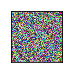

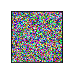

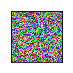

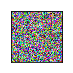

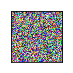

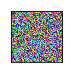

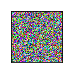

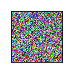

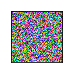

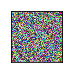

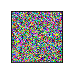

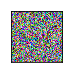

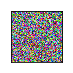

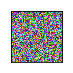

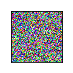

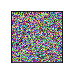

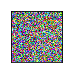

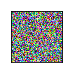

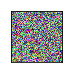

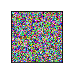

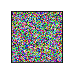

In [180]:
#Reconstructing the images back from the PCA
X_inv_proj = pca.inverse_transform(X_proj)

X_proj_img = np.reshape(X_inv_proj,(21,1,30000))  #reshaping back to the im array size


#Plotting the image reconstructions
for i in range(21):
    a = X_proj_img[i].reshape(100,100,3)

    fig = plt.figure(figsize=(6,6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(a, cmap=plt.cm.bone, interpolation='nearest') 

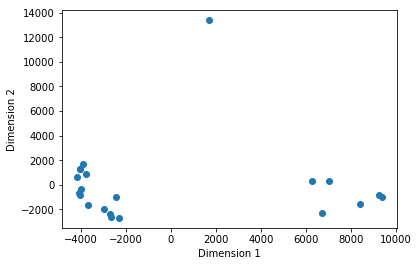

In [181]:
X_proj_X = []
X_proj_Y = []

for i in X_proj:
    X_proj_X.append(i[0])
    X_proj_Y.append(i[1])
    
plt.scatter(X_proj_X,X_proj_Y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

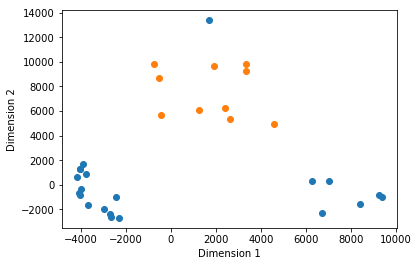

In [182]:
#Select some points randomly around the range that there are no datapoints 

x = []
y = []
for i in range(10):
    
    x.append(random.randint(-2000,5000))
    y.append(random.randint(2000,10000))


#Plotting the newly generated points in orange and the old ones in blue
plt.scatter(X_proj_X,X_proj_Y)
plt.scatter(x,y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

In [183]:
#Merging the x and y newly created datapoint with X_proj_X and X_proj_Y for the new reconstruction
aaa = np.array([[-1224,6697],[1523,4761],[-1908,7630],[2286,6043],[693,4277],[-657,4195],[1301,5816],[3249,8823],[3852,5639],[-1647,8138],[-4018.49559397,  1289.57451844],[-2673.22672659, -2580.98050814],[-2293.16474414, -2690.29096298],[-3662.54689909, -1648.17743156],[-3888.51957191,  1674.83657199],[-2982.69303227, -1970.03209815],[-4070.05550282, -648.25521258],[ 9364.57087703 ,-1003.96955644],[-3781.35788445,   848.53346172],[-4018.49559397,  1289.57451844],[ 1705.75770632, 13378.00434369],[-4001.83152264,  -328.59598126],[-4158.25349273 ,  603.80692234],[6252.9915247  ,  347.59147024],[ 9243.79602607 , -831.68609543],[7006.87838513 ,  305.58601602],[8420.85314975, -1567.18575432],[-2721.15676196, -2393.35804088],[6729.0512189,  -2278.54622764],[-4024.97480814 , -795.779215],[-2429.12675323, -1000.65073853]])

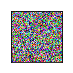

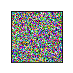

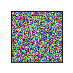

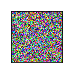

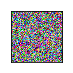

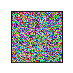

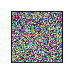

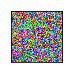

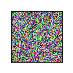

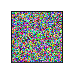

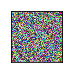

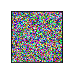

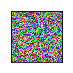

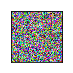

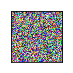

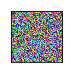

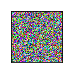

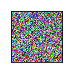

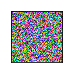

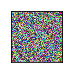

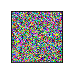

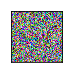

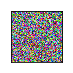

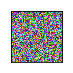

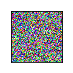

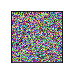

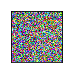

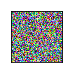

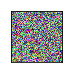

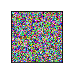

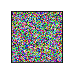

In [184]:
#Reconstructing the images back from the PCA using the newly generated points 
X_inv_proj = pca.inverse_transform(aaa)

X_proj_img = np.reshape(X_inv_proj,(31,1,30000))  #reshaping back to the im array size


#Plotting the image reconstructions
for i in range(31):
    a = X_proj_img[i].reshape(100,100,3)

    fig = plt.figure(figsize=(6,6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(a, cmap=plt.cm.bone, interpolation='nearest') 